In [ ]:
!pip install datascience

In [ ]:
from datascience import *
%matplotlib inline
path_data = 'data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

# 백분위수
수치 데이터는 증가 또는 감소 순서로 정렬할 수 있습니다. 따라서 수치 데이터셋의 값들은 *순위 순서*를 가집니다. 백분위수는 특정 순위에 있는 값입니다.

예를 들어, 시험에서 여러분의 점수가 95번째 백분위수에 있다면, 일반적인 해석은 점수의 5%만이 여러분보다 높다는 것입니다. 중앙값은 50번째 백분위수입니다. 일반적으로 데이터셋의 값 중 50%가 중앙값보다 높다고 가정합니다.

그러나 모든 순위와 모든 리스트에 대해 작동하는 백분위수의 정확한 정의를 제공하는 데는 주의가 필요합니다. 이를 알아보기 위해, 반의 모든 학생들이 시험에서 75점을 받은 극단적인 예를 생각해봅시다. 그러면 75는 중앙값의 자연스러운 후보이지만, 점수의 50%가 75보다 높다고 말하는 것은 사실이 아닙니다. 또한 75는 95번째 백분위수, 25번째 또는 다른 어떤 백분위수의 동등하게 자연스러운 후보입니다. 동점 – 즉, 동일한 데이터 값 – 은 백분위수를 정의할 때 고려해야 합니다.

관련 인덱스가 명확하지 않을 때 리스트를 얼마나 올라가야 하는지에 대해서도 주의해야 합니다. 예를 들어, 10개 값의 모음에서 87번째 백분위수는 무엇이어야 할까요? 정렬된 모음의 8번째 값일까요, 9번째일까요, 아니면 그 사이 어딘가일까요?

이 절에서는 모든 순위와 모든 리스트에 대해 일관되게 작동하는 정의를 제공할 것입니다.

## 수치 예제
모든 백분위수의 일반적인 정의를 제공하기 전에, 값 모음의 80번째 백분위수를 모든 값의 80% 이상인 모음의 가장 작은 값으로 정의하겠습니다.

예를 들어, 다섯 개의 가장 큰 대륙 – 아프리카, 남극 대륙, 아시아, 북아메리카, 남아메리카 – 의 크기를 가장 가까운 백만 평방 마일로 반올림한 것을 생각해봅시다.

In [ ]:
sizes = make_array(12, 17, 6, 9, 7)

80번째 백분위수는 `sizes`의 요소 중 80%, 즉 5개 요소 중 4/5 이상인 가장 작은 값입니다. 그것은 12입니다:

In [ ]:
np.sort(sizes)

array([ 6,  7,  9, 12, 17])

80번째 백분위수는 리스트의 값, 즉 12입니다. 값의 80%가 그것보다 작거나 같고, 이것이 사실인 리스트의 가장 작은 값임을 알 수 있습니다.

유사하게, 70번째 백분위수는 `sizes`의 요소 중 70% 이상인 모음의 가장 작은 값입니다. 이제 5개 요소의 70%는 "3.5개 요소"이므로, 70번째 백분위수는 리스트의 4번째 요소입니다. 그것은 12로, 이 데이터에 대한 80번째 백분위수와 같습니다.

## `percentile` 함수
`percentile` 함수는 두 개의 인수를 받습니다: 0과 100 사이의 순위, 그리고 배열입니다. 이것은 배열의 해당 백분위수를 반환합니다.

In [ ]:
percentile(70, sizes)

12

### 일반적인 정의

$p$를 0과 100 사이의 숫자라고 하겠습니다. 모음의 $p$번째 백분위수는 모든 값의 p% 이상인 모음의 가장 작은 값입니다.

이 정의에 따르면, 0과 100 사이의 모든 백분위수는 모든 값 모음에 대해 계산할 수 있으며, 항상 모음의 요소입니다.

실제 용어로, 모음에 $n$개의 요소가 있다고 가정합시다. $p$번째 백분위수를 찾으려면:
- 모음을 증가 순서로 정렬합니다.
- n의 p%를 찾습니다: $(p/100) \times n$. 이것을 $k$라고 합시다.
- $k$가 정수이면 정렬된 모음의 $k$번째 요소를 선택합니다.
- $k$가 정수가 아니면 다음 정수로 올림하여 정렬된 모음의 해당 요소를 선택합니다.

### 예제
테이블 `scores_and_sections`는 359명의 학생으로 구성된 반의 각 학생에 대한 한 행을 포함합니다. 열은 학생의 토론 섹션과 중간고사 점수입니다.

In [ ]:
scores_and_sections = Table.read_table(path_data + 'scores_by_section.csv')
scores_and_sections

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


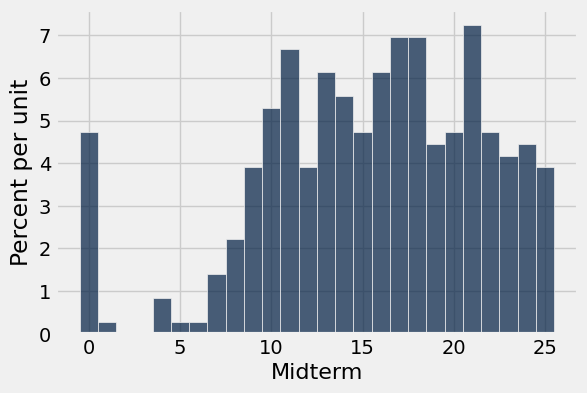

In [ ]:
scores_and_sections.select('Midterm').hist(bins=np.arange(-0.5, 25.6, 1))

점수의 85번째 백분위수는 무엇이었을까요? `percentile` 함수를 사용하려면 중간고사 점수를 포함하는 배열 `scores`를 만들고 85번째 백분위수를 찾습니다:

In [ ]:
scores = scores_and_sections.column(1)

In [ ]:
percentile(85, scores)

22

percentile 함수에 따르면, 85번째 백분위수는 22였습니다. 이것이 우리의 새로운 정의와 일치하는지 확인하기 위해 정의를 직접 적용해봅시다.

먼저, 점수를 증가 순서로 정렬합니다:

In [ ]:
sorted_scores = np.sort(scores_and_sections.column(1))

배열에 359개의 점수가 있습니다. 따라서 다음으로 359의 85%를 찾습니다. 이것은 305.15입니다.

In [ ]:
0.85 * 359

305.15

이것은 정수가 아닙니다. 우리의 정의에 따르면, 85번째 백분위수는 `sorted_scores`의 306번째 요소이며, Python의 인덱싱 규칙에 따라 배열의 항목 305입니다.

In [ ]:
# 정렬된 배열의 306번째 요소

sorted_scores.item(305)

22

이것은 `percentile`을 사용하여 얻은 답과 같습니다. 앞으로는 단지 `percentile`을 사용할 것입니다.

## 사분위수
수치 모음의 *1사분위수*는 25번째 백분위수입니다. 이 용어는 *첫 번째 분기*에서 유래합니다. 2사분위수는 중앙값이고, 3사분위수는 75번째 백분위수입니다.

우리의 `scores` 데이터에 대해 이러한 값들은 다음과 같습니다:

In [ ]:
percentile(25, scores)

11

In [ ]:
percentile(50, scores)

16

In [ ]:
percentile(75, scores)

20

점수의 분포는 때때로 1사분위수와 3사분위수 사이의 "중간 50%" 구간으로 요약됩니다.